In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Loading and Cleaning

In [10]:
df = pd.read_csv("harga-rumah-teres-mengikut-negeri.csv")
df = df.dropna()
columns = list(df.columns)[2:]

# Remove commas to enable conversion to integer
for column in columns:
    curr = df[column]
    for row in curr:
        df[column] = df[column].replace(row,row.replace(",",""))

# Convert to integer
for column in columns:
    df[column] = pd.to_numeric(df[column])

print(df.dtypes)
df

Tahun              float64
Quarter             object
Malaysia             int64
Kuala Lumpur         int64
Selangor             int64
Johor                int64
Pulau Pinang         int64
Negeri Sembilan      int64
Perak                int64
Melaka               int64
Kedah                int64
Pahang               int64
Terengganu           int64
Kelantan             int64
Perlis               int64
Sabah                int64
Sarawak              int64
dtype: object


,Tahun,Quarter,Malaysia,Kuala Lumpur,Selangor,Johor,Pulau Pinang,Negeri Sembilan,Perak,Melaka,Kedah,Pahang,Terengganu,Kelantan,Perlis,Sabah,Sarawak
0,2009.0,Q1,172036,349857,212860,140992,244082,104924,101046,86222,94774,122338,98141,98464,76963,219752,195590
1,2009.0,Q2,175808,349087,219963,143912,255146,108396,98375,86500,96829,126451,98731,108736,81461,223999,195785
2,2009.0,Q3,179409,364146,226059,146453,263807,106508,98996,91309,97005,124453,104921,112986,86901,229333,184626
3,2009.0,Q4,178402,369807,230847,125652,261951,106249,102311,88931,98075,122338,107030,117508,90713,237169,197268
4,2010.0,Q1,178880,354521,233516,127928,261708,108152,101128,87102,100183,124740,105609,115352,86340,250038,190388
5,2010.0,Q2,189412,393730,245457,144630,271364,108821,103156,91774,103963,129889,113865,112098,87425,252735,193344
6,2010.0,Q3,191055,385976,252272,138311,273868,110340,105240,94906,103543,129115,111458,126504,95129,253849,203589
7,2010.0,Q4,193481,391263,261917,133292,278959,116783,107243,94264,105077,129746,118935,124809,87425,259720,213663
8,2011.0,Q1,199318,404590,268302,136057,278963,124792,111923,93704,103902,136050,114800,135099,94869,259363,209942
9,2011.0,Q2,205378,453322,281136,134527,298784,120836,113961,96257,114157,132467,127672,129069,98433,271758,202696


## Visualisation of Original Data Set (Overall Malaysia Data)

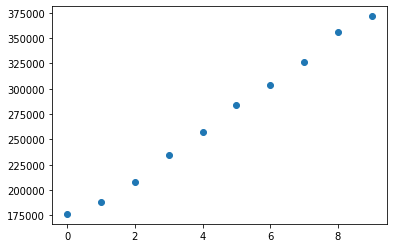

In [11]:
'''
Let x be the number of years since 2009
Let y be the average house price in that year (Malaysia)
'''

x = np.array([2018 - i for i in range(2018,2008,-1)])
y = []

years = sorted(set(df["Tahun"].astype("int32")))

# Calculate Average Per Year Based on 4 Quarters
for year in years:
    y.append(df[df["Tahun"] == year]["Malaysia"].mean())

y = np.array(y)

plt.scatter(x,y)
plt.title("Average Terrace House Prices (Malaysia)")
plt.xlabel("Years Since 2009")
plt.ylabel("Average Price")
plt.show()


## Univariate Linear Regression through Gradient Descent

Compared to the original project which used the least square method (or the normal equation method), this implementation explores the use of gradient descent to find the optimum values for theta. This implementation is specifically for univariate linear regression and does not support more features. To do this, it might be better to either use a vectorised approach or an iterative method to calculate all derivatives and to update the values of theta.

Through the cost function value visualisation with respect to the number of iterations, we can see that the value decreases as the number of iterations increase. This shows that gradient descent is functioning properly with the chosen learning rate.

Parameter values obtained through gradient descent: 
 Theta0 : 168140.01562995213
 Theta1 : 22764.200347268663


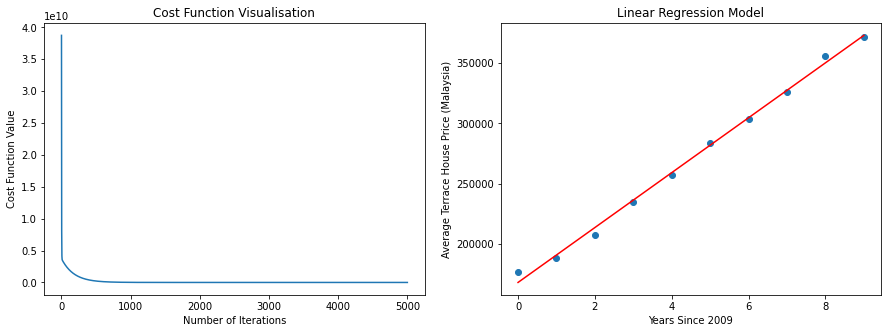

In [20]:
# Initial values of parameters that would be the starting point for gradient descent.
# Our linear regression model would be in the form of h(x) = theta_0 + theta_1(x)
theta_0 = 0
theta_1 = 0

# alpha
learning_rate = 0.01

# m = the number of training samples
m = len(x)
iterations = 5000

cost_function_values = np.array([])

# Gradient Descent
for i in range(iterations):
    # This is an array of predicted y values for each input x.
    # With this array, we can hence calculate the sum of the squared differences with the original y array.
    predicted_y = theta_1*x + theta_0

    # Compute the cost using the following thetas and append to the array.
    current_J = sum((predicted_y-y)**2)/(2*m)
    cost_function_values = np.append(cost_function_values, current_J)

    # Partial derivative with respect to theta 0
    d_theta_0 = (sum(predicted_y - y)) / m
    # Partial derivative with respect to theta 1
    d_theta_1 = (sum((predicted_y - y)*x)) / m
    
    theta_0 = theta_0 - learning_rate*(d_theta_0)
    theta_1 = theta_1 - learning_rate*(d_theta_1)

print(f"Parameter values obtained through gradient descent: \n Theta0 : {theta_0}\n Theta1 : {theta_1}")

x_axis = np.array([i for i in range(iterations)])

fig = plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
plt.plot(x_axis, cost_function_values)
plt.xlabel("Number of Iterations")
plt.ylabel("Cost Function Value")
plt.title("Cost Function Visualisation")

model_y = np.array([(i*theta_1 + theta_0) for i in range(0,10)])

plt.subplot(1,2,2)
plt.plot(x,y,"o")
plt.plot(x,model_y, color='red')
plt.title("Linear Regression Model")
plt.xlabel("Years Since 2009")
plt.ylabel("Average Terrace House Price (Malaysia)")
plt.show()
